# Comparing Evaluations

                 LR        NN        RF       SVM
Accuracy   0.569460  0.706659  0.879900  0.613744
Precision  0.568139  0.702124  0.879884  0.609963
Recall     0.570690  0.719173  0.880245  0.617200
F1         0.569460  0.706659  0.879900  0.613744
AUC_ROC    0.595717  0.769200  0.933928  0.676047


/home/useradd/GITHUB/Research/Implementation/plotter.py:170: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.columns if group_by_model else df.index, rotation=rotation)


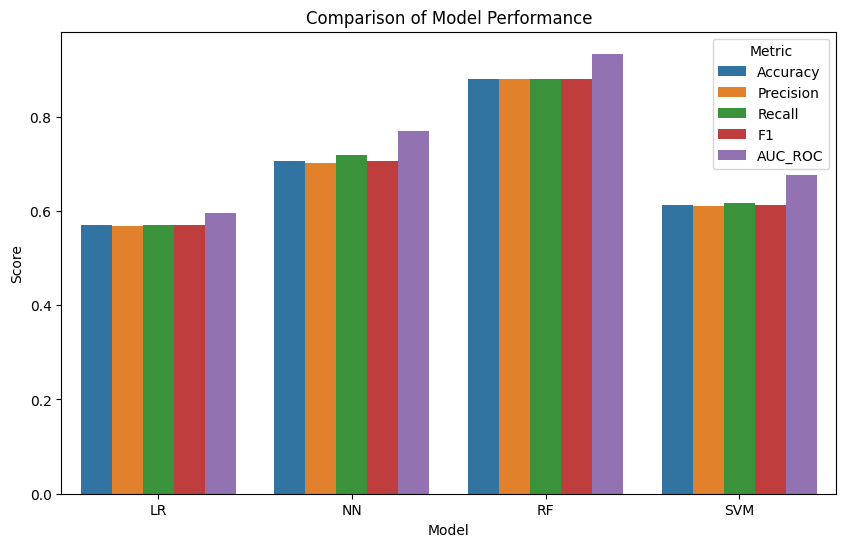

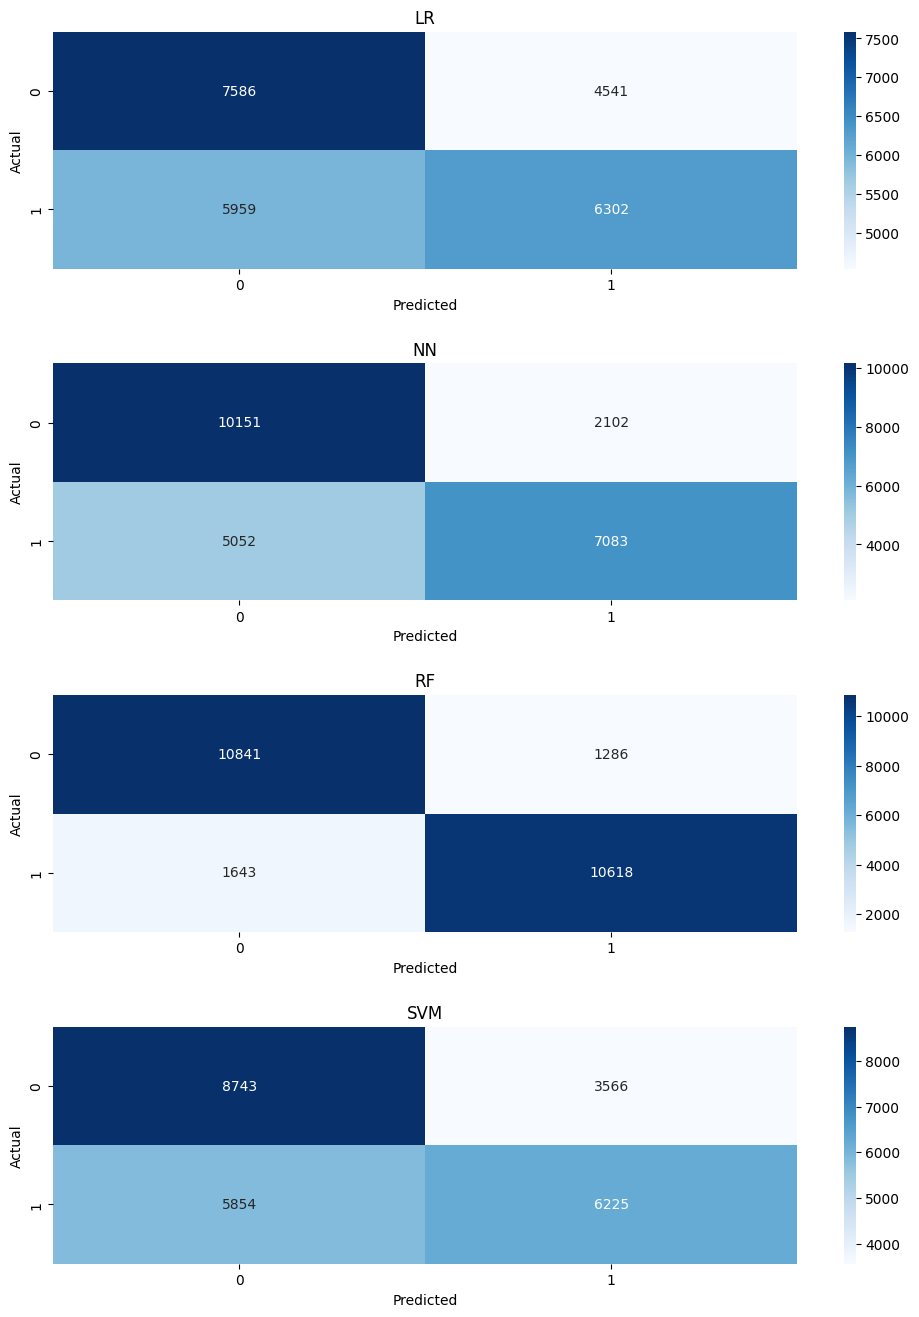

In [10]:
import plotter
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt

path = "metrics/LR_metrics.pkl"

LR_conf_matrix, LR_class_report, LR_scores = plotter.load_model(path)
LR_accuracy = LR_scores['accuracy']
LR_precision = LR_scores['precision']
LR_recall = LR_scores['recall']
LR_f1 = LR_scores['f1']
LR_auc_roc = LR_scores['auc_roc']
LR_fpr = LR_scores['fpr']
LR_tpr = LR_scores['tpr']

path = "metrics/NN_metrics.pkl"

NN_conf_matrix, NN_class_report, NN_scores = plotter.load_model(path)
NN_accuracy = NN_scores['accuracy']
NN_precision = NN_scores['precision']
NN_recall = NN_scores['recall']
NN_f1 = NN_scores['f1']
NN_auc_roc = NN_scores['auc_roc']
NN_fpr = NN_scores['fpr']
NN_tpr = NN_scores['tpr']

path = "metrics/RF_metrics.pkl"

RF_conf_matrix, RF_class_report, RF_scores = plotter.load_model(path)
RF_accuracy = RF_scores['accuracy']
RF_precision = RF_scores['precision']
RF_recall = RF_scores['recall']
RF_f1 = RF_scores['f1']
RF_auc_roc = RF_scores['auc_roc']
RF_fpr = RF_scores['fpr']
RF_tpr = RF_scores['tpr']

path = "metrics/SVM_metrics.pkl"

SVM_conf_matrix, SVM_class_report, SVM_scores = plotter.load_model(path)
SVM_accuracy = SVM_scores['accuracy']
SVM_precision = SVM_scores['precision']
SVM_recall = SVM_scores['recall']
SVM_f1 = SVM_scores['f1']
SVM_auc_roc = SVM_scores['auc_roc']
SVM_fpr = SVM_scores['fpr']
SVM_tpr = SVM_scores['tpr']

metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC_ROC']
models = ['LR', 'NN', 'RF', 'SVM']
scores = pd.DataFrame({"LR": [LR_accuracy, LR_f1, LR_precision, LR_recall, LR_auc_roc], 
                           "NN": [NN_accuracy, NN_f1, NN_precision, NN_recall, NN_auc_roc], 
                           "RF": [RF_accuracy, RF_f1, RF_precision, RF_recall, RF_auc_roc], 
                           "SVM": [SVM_accuracy, SVM_f1, SVM_precision, SVM_recall, SVM_auc_roc]},
                           index=metrics)

print(scores)

# Plotting the comparison
plotter.plot_model_comparison(scores, title="Model Performance", rotation=0, group_by_model=True)

confusions = pd.DataFrame({'LR': np.array(LR_conf_matrix).flatten(),
                           'NN': np.array(NN_conf_matrix).flatten(),
                           'RF': np.array(RF_conf_matrix).flatten(),
                           'SVM': np.array(SVM_conf_matrix).flatten()})

# Plot the confusion matrix heatmaps
plotter.plot_confusion_matrix_heatmaps(confusions, title='Model Confusion Matrix Comparisons', solo=True)


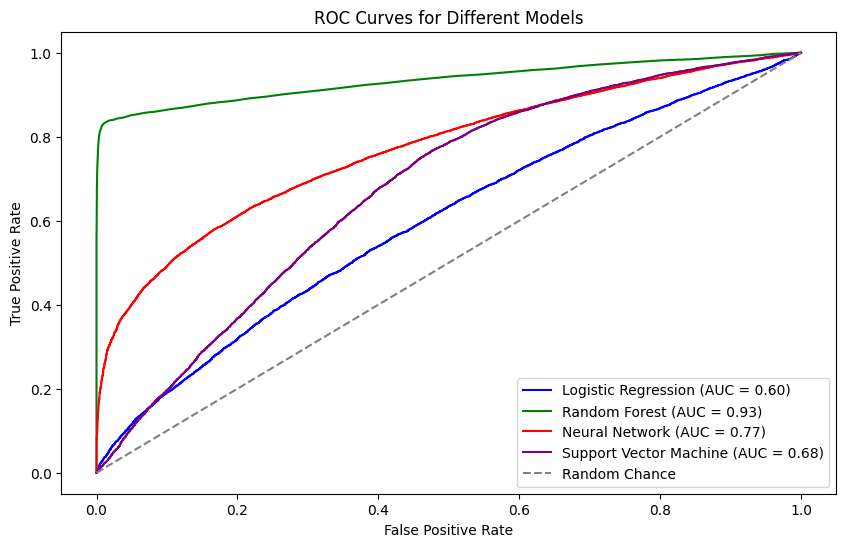

In [12]:
# Plot all ROC curves on the same plot
plt.figure(figsize=(10, 6))

# Logistic Regression ROC Curve
plt.plot(LR_fpr, LR_tpr, color='blue', label=f'Logistic Regression (AUC = {LR_auc_roc:.2f})')

# Random Forest ROC Curve
plt.plot(RF_fpr, RF_tpr, color='green', label=f'Random Forest (AUC = {RF_auc_roc:.2f})')

# Neural Network ROC Curve
plt.plot(NN_fpr, NN_tpr, color='red', label=f'Neural Network (AUC = {NN_auc_roc:.2f})')

# Support Vector Machine ROC Curve
plt.plot(SVM_fpr, SVM_tpr, color='purple', label=f'Support Vector Machine (AUC = {SVM_auc_roc:.2f})')

# Diagonal line for random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Chance')

# Plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

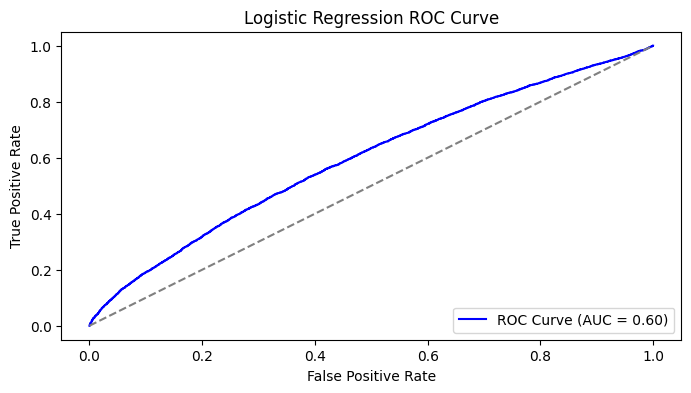

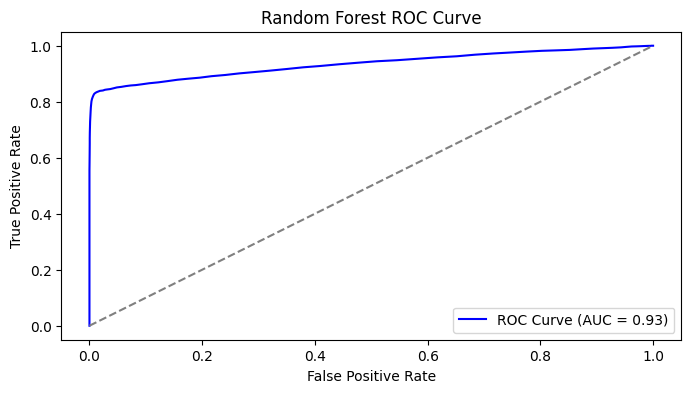

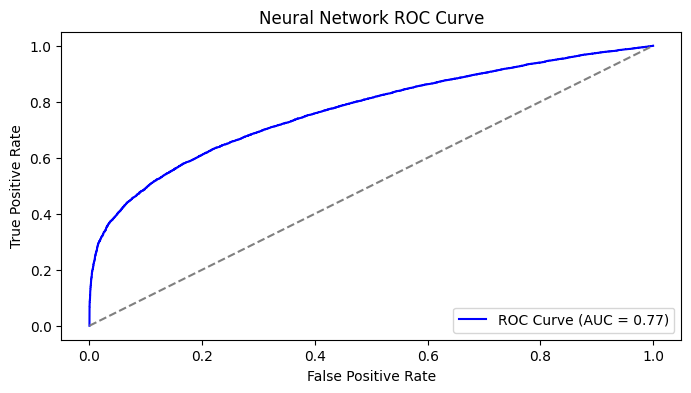

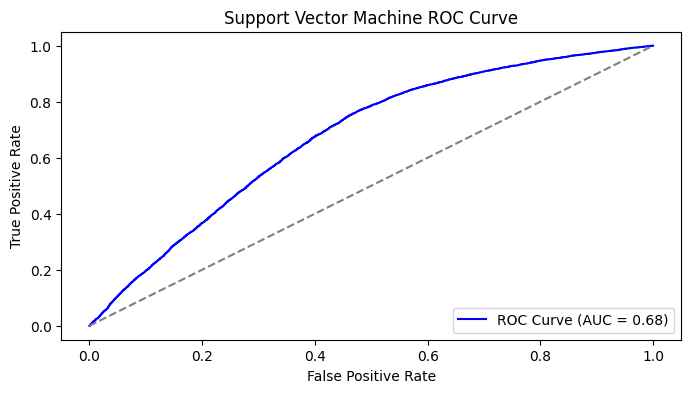

In [11]:
# Plot the ROC curve
plt.figure(figsize=(8, 4))
plt.plot(LR_fpr, LR_tpr, color='blue', label=f'ROC Curve (AUC = {LR_auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 4))
plt.plot(RF_fpr, RF_tpr, color='blue', label=f'ROC Curve (AUC = {RF_auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 4))
plt.plot(NN_fpr, NN_tpr, color='blue', label=f'ROC Curve (AUC = {NN_auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Neural Network ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 4))
plt.plot(SVM_fpr, SVM_tpr, color='blue', label=f'ROC Curve (AUC = {SVM_auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Support Vector Machine ROC Curve')
plt.legend(loc="lower right")
plt.show()

                 LR        RF        NN       SVM
Accuracy   0.712123  0.885534  0.828275  0.771112
Precision  0.712553  0.881125  0.794588  0.762536
Recall     0.758569  0.866685  0.781256  0.752254
F1         0.734841  0.873845  0.787866  0.757360
AUC_ROC    0.751525  0.899556  0.800113  0.689972


/home/useradd/GITHUB/Research/Implementation/plotter.py:170: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.columns if group_by_model else df.index, rotation=rotation)


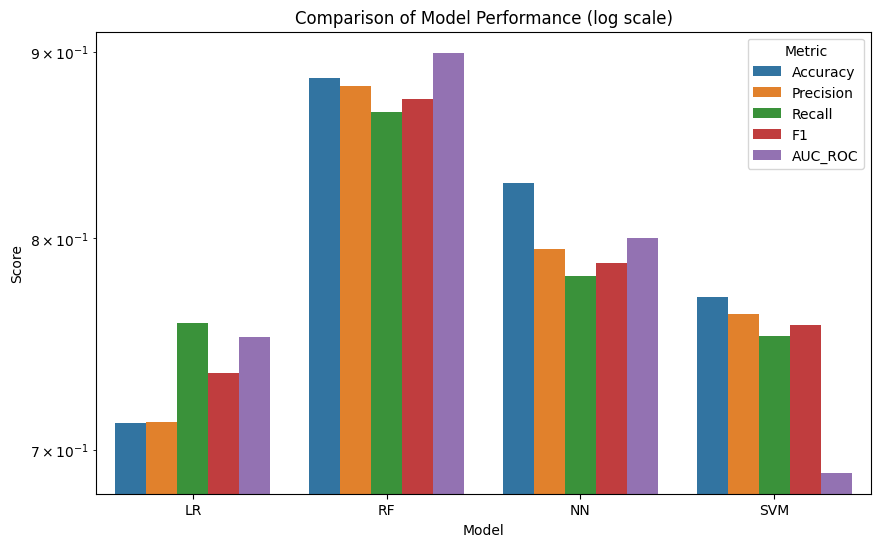

In [7]:
importlib.reload(plotter)

path = "metrics/LR_metrics.pkl"

LR_conf_matrix, LR_class_report, LR_scores = plotter.load_model(path)
LR_accuracy = 0.7121234
LR_precision = 0.712553
LR_recall = 0.758568554
LR_f1 = 2 * (LR_precision * LR_recall) / (LR_precision + LR_recall)
LR_auc_roc = 0.7515254

path = "metrics/NN_metrics.pkl"

NN_conf_matrix, NN_class_report, NN_scores = plotter.load_model(path)
NN_accuracy = 0.8282747
NN_precision = 0.7945883
NN_recall = 0.7812556
NN_f1 = 2 * (NN_precision * NN_recall) / (NN_precision + NN_recall)
NN_auc_roc = 0.800112563

path = "metrics/RF_metrics.pkl"

RF_conf_matrix, RF_class_report, RF_scores = plotter.load_model(path)
RF_accuracy = 0.8855341
RF_precision = 0.88112451
RF_recall = 0.8666852
RF_f1 = 2 * (RF_precision * RF_recall) / (RF_precision + RF_recall)
RF_auc_roc = 0.899556

path = "metrics/SVM_metrics.pkl"

SVM_conf_matrix, SVM_class_report, SVM_scores = plotter.load_model(path)
SVM_accuracy = 0.77111243
SVM_precision = 0.7625364
SVM_recall = 0.75225356
SVM_f1 = 2 * (SVM_precision * SVM_recall) / (SVM_precision + SVM_recall)
SVM_auc_roc = 0.689972

metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC_ROC']
models = ['LR', 'NN', 'RF', 'SVM']
scores = pd.DataFrame({"LR": [LR_accuracy, LR_precision, LR_recall, LR_f1, LR_auc_roc], 
                           "RF": [RF_accuracy, RF_precision, RF_recall, RF_f1, RF_auc_roc], 
                           "NN": [NN_accuracy, NN_precision, NN_recall, NN_f1, NN_auc_roc], 
                           "SVM": [SVM_accuracy, SVM_precision, SVM_recall, SVM_f1, SVM_auc_roc]},
                           index=metrics)

print(scores)

# Plotting the comparison
plotter.plot_model_comparison(scores, title="Model Performance", rotation=0, log_scale=True, group_by_model=True)

# confusions = pd.DataFrame({'LR': np.array(LR_conf_matrix).flatten(),
#                            'NN': np.array(NN_conf_matrix).flatten(),
#                            'RF': np.array(RF_conf_matrix).flatten(),
#                            'SVM': np.array(SVM_conf_matrix).flatten()})

# # Plot the confusion matrix heatmaps
# plotter.plot_confusion_matrix_heatmaps(confusions, title='Model Confusion Matrix Comparisons', solo=True)